In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [160]:
# Agregar el dataset 'survey_results_public.csv' en el directorio data/
df = pd.read_csv('data/survey_results_public.csv')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [162]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [163]:
# Select cols.
ATTRS = ['MainBranch', 'Age', 'Age1stCode', 'CompFreq', 'ConvertedComp', 'Country',
         'DevType', 'EdLevel', 'Employment', 'Gender', 'JobFactors',
         'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'NEWCollabToolsDesireNextYear',
         'NEWCollabToolsWorkedWith', 'NEWEdImpt', 'NEWJobHunt', 'NEWOnboardGood', 'NEWOvertime',
         'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']

df = df[ATTRS]

In [164]:
# Only developers by profession.
df = df[df['MainBranch'] == 'I am a developer by profession']
df.drop('MainBranch', 1, inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47193 entries, 0 to 64159
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           34348 non-null  float64
 1   Age1stCode                    42944 non-null  object 
 2   CompFreq                      36310 non-null  object 
 3   ConvertedComp                 31581 non-null  float64
 4   Country                       47008 non-null  object 
 5   DevType                       41733 non-null  object 
 6   EdLevel                       42781 non-null  object 
 7   Employment                    46930 non-null  object 
 8   Gender                        37592 non-null  object 
 9   JobFactors                    38553 non-null  object 
 10  JobSat                        40764 non-null  object 
 11  JobSeek                       40376 non-null  object 
 12  LanguageDesireNextYear        39951 non-null  object 
 13  L

In [ ]:
# Age1stCode, YearsCode, YearsCodePro

In [142]:
# DevType proccess.
# TOP 6 types.
# Developer, back-end
# 55.2%
# Developer, full-stack
# 54.9%
# Developer, front-end
# 37.1%
# Developer, desktop or enterprise applications
# 23.9%
# Developer, mobile
# 19.2%
# DevOps specialist
DEV_TYPES = ['Developer, back-end', 'Developer, full-stack', 'Developer, front-end',
    'Developer, desktop or enterprise applications', 'Developer, mobile', 'DevOps specialist']

for dev_type in DEV_TYPES:
    t = dev_type.replace('-', ' ').split(' ')
    t = ''.join([x.capitalize() for x in t]).replace(',', '')
    
    df['DevType' + t] = np.where(df['DevType'].str.contains(dev_type), 1, 0)

df['DevTypeOther'] = np.where(
    (df['DevTypeDeveloperBackEnd'] == 0) & (df['DevTypeDeveloperFullStack'] == 0)
    & (df['DevTypeDeveloperFrontEnd'] == 0) & (df['DevTypeDeveloperDesktopOrEnterpriseApplications'] == 0) &
    (df['DevTypeDeveloperMobile'] == 0) & (df['DevTypeDevopsSpecialist'] == 0), 
    1, 0)

df.drop('DevType', 1, inplace=True)

<AxesSubplot:>

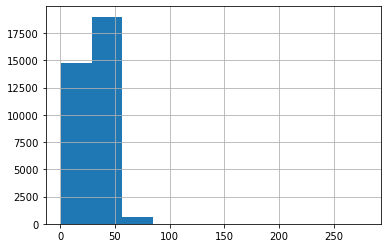

In [143]:
# Age
df['Age'].hist()

In [144]:
# Age procces
df[df['Age'] > 100] = None

In [145]:
df['Age1stCode'].describe()

count     42943
unique       53
top          15
freq       4324
Name: Age1stCode, dtype: object

In [146]:
df['CompFreq'].isna().sum()

10884

In [147]:
df['OrgSize']

0                2 to 9 employees
1        1,000 to 4,999 employees
3              20 to 99 employees
5                             NaN
6              20 to 99 employees
                   ...           
64154          20 to 99 employees
64155                         NaN
64157                         NaN
64158                         NaN
64159                         NaN
Name: OrgSize, Length: 47193, dtype: object

In [148]:
def parse_org_size(row):
    org_size = row['OrgSize']
    if isinstance(org_size, str):
        if not 'known' in org_size:
            return org_size

df['OrgSize'] = df.apply(parse_org_size, axis = 1)

In [149]:
# 'LanguageDesireNextYear', 'LanguageWorkedWith'

def parse_languages_desire(row):
    worked_with = row['LanguageWorkedWith']
    next_year = row['LanguageDesireNextYear']
    if isinstance(worked_with, str) and isinstance(next_year, str):
        worked_with, next_year = worked_with.split(';'), next_year.split(';')
        result = set(next_year) - set(worked_with)
        return 1 if len(result) < len(next_year) else 0
       

df['LanguagesWorkedAndDesire'] = df.apply(parse_languages_desire, axis = 1)
df.drop(['LanguageDesireNextYear', 'LanguageWorkedWith'], 1, inplace=True)

<AxesSubplot:>

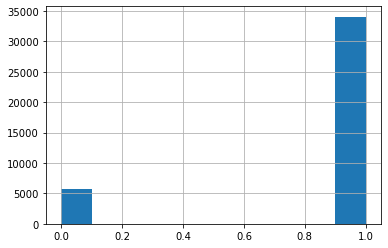

In [150]:
df['LanguagesWorkedAndDesire'].hist()

In [151]:
# 'NEWCollabToolsDesireNextYear','NEWCollabToolsWorkedWith'

def parse_languages_desire(row):
    worked_with = row['NEWCollabToolsWorkedWith']
    next_year = row['NEWCollabToolsDesireNextYear']
    if isinstance(worked_with, str) and isinstance(next_year, str):
        worked_with, next_year = worked_with.split(';'), next_year.split(';')
        result = set(next_year) - set(worked_with)
        return 1 if len(result) < len(next_year) else 0
       

df['CollabToolsWorkedAndDesire'] = df.apply(parse_languages_desire, axis = 1)
df.drop(['NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith'], 1, inplace=True)

<AxesSubplot:>

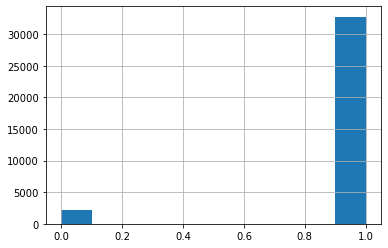

In [152]:
df['CollabToolsWorkedAndDesire'].hist()

In [153]:
# Class in 2 buckets.
# ["Slightly satisfied", "Very satisfied"] -> 1
# ["Very dissatisfied", "Slightly dissatisfied"] -> 0
def job_sat(row):
    job_sat = row["JobSat"]
    sat_labels = ["Slightly satisfied", "Very satisfied"]
    not_sat_labels = ["Very dissatisfied", "Slightly dissatisfied"]
    if isinstance(job_sat, str):
        if job_sat in sat_labels:
            return 1
        elif job_sat in not_sat_labels:
            return 0
        
df['JobSat'] = df.apply(job_sat, axis = 1)
# Drop if JobSat (class) is null.
df.dropna(subset = ["JobSat"], inplace=True)

In [154]:
# Gender
def gender(row):
    gender = row["Gender"]
    if isinstance(gender, str):
        if gender == "Man":
            return "Man"
        elif gender == "Woman":
            return "Woman"
        else:
            return "Other"
        
df['Gender'] = df.apply(gender, axis = 1)

In [155]:
# Country
df.dropna(subset = ["Country"], inplace=True)
TOP_COUNTRIES = df['Country'].value_counts().index[:25]
def country(row):
    country = row['Country']
    if isinstance(country, str):
        if country in TOP_COUNTRIES:
            return country
        else:
            return 'Other'

df['Country'] = df.apply(country, axis = 1)

In [156]:
# Set class as last col.
CLASS = 'JobSat'
aux = df[CLASS]
df.drop(CLASS, 1, inplace=True)
df[CLASS] = aux

In [157]:
df.to_csv('data_first.csv', index=False)